In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import re

%matplotlib inline
plt.rcParams.update({'font.size': 14})

In [2]:
url = 'https://raw.githubusercontent.com/dtrihinas/covid-19-cyprus-data/master/coronavirus_cyprus_data.csv'
data = pd.read_csv(url, index_col='caseid')
data.head()

,date,gender,age,nationality,area,impact,profession,hospitalized,ICU,recovered,relation,notes
caseid,,,,,,,,,,,,
1,10/03/2020,M,25.0,cypriot,limassol,travel (italy),NaN,0,0,1,-1,NaN
2,10/03/2020,M,64.0,cypriot,nicosia,travel (uk),doctor,0,0,0,-1,NaN
3,11/03/2020,M,NaN,cypriot,nicosia,travel (uk),NaN,1,0,0,-1,NaN
4,11/03/2020,F,NaN,cypriot,nicosia,travel (uk),NaN,1,0,0,-1,NaN
5,11/03/2020,F,NaN,greek,limassol,travel (italy),NaN,1,0,0,-1,NaN


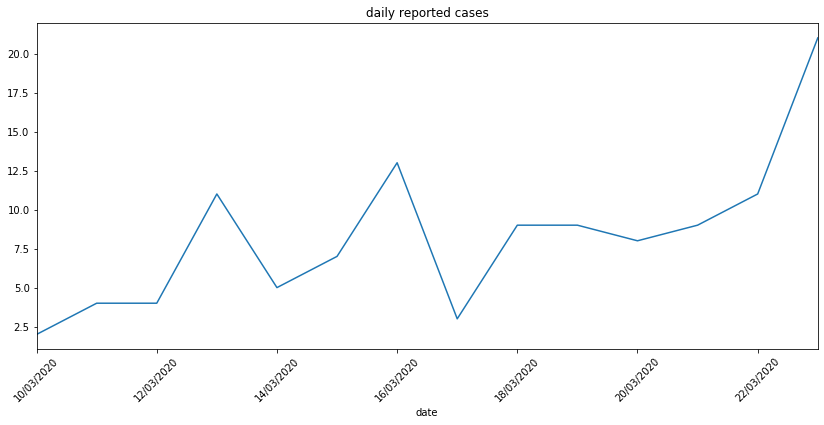

In [3]:
cum_cases = data.groupby('date').size()
cum_cases.plot(figsize=(14,6), title='daily reported cases', rot=45)

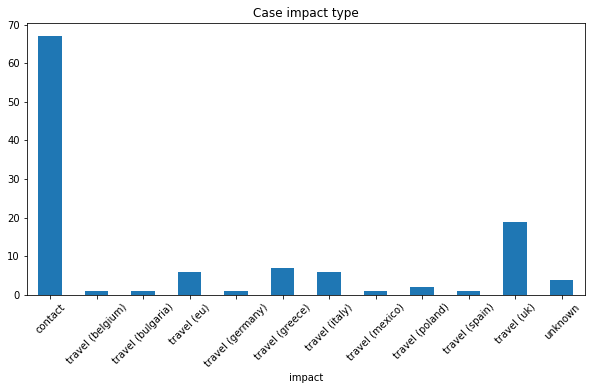

In [4]:
case_impact = data.groupby('impact').size()
case_impact.plot(kind='bar',x='impact',y='cases', title='Case impact type', rot=45, figsize=(10,5))

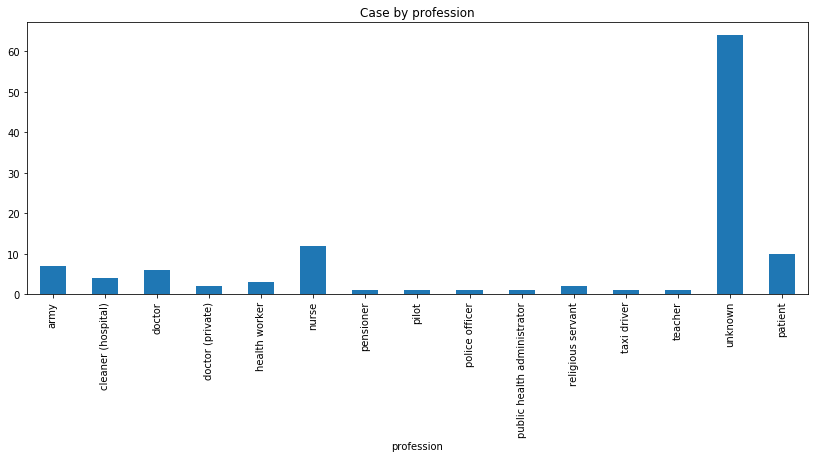

In [5]:
case_profession = data.groupby('profession').size()
unknown_prof = data.index.size - case_profession.sum()
case_profession['unknown'] = unknown_prof
patients = ~case_profession.index.str.extract(r'(^patient)').isna()[0].values #bool array matching patients
total_patient_count = case_profession[patients].sum() #merge patient count from different hospitals
case_profession[patients == True] = np.nan
case_profession = case_profession.dropna()
case_profession['patient'] = total_patient_count
case_profession.plot(kind='bar',x='profession',y='cases', title='Case by profession', rot=90, figsize=(14,5))

In [44]:
g = nx.DiGraph()
g.add_nodes_from(data.index.values)

r1 = re.compile(r'travel')
r2 = re.compile(r'\((.*?)\)')
impact_filter = np.vectorize(lambda x : bool(r1.search(x)))
country_selector = np.vectorize(lambda x : r2.search(x).group(1))
d = data['impact'].unique()
country_arr = country_selector(d[impact_filter(d)])
g.add_nodes_from(country_arr)
print(g.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 'italy', 'uk', 'greece', 'germany', 'belgium', 'bulgaria', 'spain', 'poland', 'mexico', 'eu']


In [58]:
def upd_edge_list(lst, tup):
    if isinstance(tup[1], float):
        pass #unknown contact connection
    elif tup[1] == '-1':
        if 'travel' in tup[2]:
            country = r2.search(tup[2]).group(1) 
            tup = (int(tup[0]), country) #travel cases link to country
        else:
            tup = (int(tup[0]), int(tup[0])) #unknown cases link to themselves
        lst.append(tup)
    elif '{' in tup[1]:
        x = re.findall(r'[0-9]+', tup[1]) 
        for i in x:
            lst.append((int(tup[0]), int(i))) #link to multiple cases
    else:
        lst.append((int(tup[0]),int(tup[1])))

elist = []

data.apply(lambda row : 
           upd_edge_list(elist, (row.name, row.relation, row.impact)), 
           axis=1)

elist

[(1, 'italy'),
 (2, 'uk'),
 (3, 'uk'),
 (4, 'uk'),
 (5, 'italy'),
 (6, 6),
 (7, 'uk'),
 (8, 'italy'),
 (9, 'greece'),
 (10, 'germany'),
 (11, 'greece'),
 (12, 'greece'),
 (13, 9),
 (15, 15),
 (16, 6),
 (17, 9),
 (18, 9),
 (19, 9),
 (20, 9),
 (21, 'uk'),
 (22, 'italy'),
 (23, 'italy'),
 (24, 9),
 (26, 26),
 (27, 'uk'),
 (28, 'uk'),
 (29, 'uk'),
 (30, 'uk'),
 (31, 'uk'),
 (32, 'uk'),
 (33, 'uk'),
 (34, 'uk'),
 (35, 'greece'),
 (36, 26),
 (37, 26),
 (38, 26),
 (39, 26),
 (40, 26),
 (40, 26),
 (42, 26),
 (43, 26),
 (44, 26),
 (45, 26),
 (46, 26),
 (47, 35),
 (48, 34),
 (49, 'belgium'),
 (50, 'greece'),
 (51, 'greece'),
 (52, 'greece'),
 (53, 26),
 (54, 51),
 (57, 'uk'),
 (59, 61),
 (60, 50),
 (60, 26),
 (61, 26),
 (62, 26),
 (63, 26),
 (65, 'italy'),
 (66, 'uk'),
 (67, 'bulgaria'),
 (70, 26),
 (71, 26),
 (72, 26),
 (73, 11),
 (73, 12),
 (79, 26),
 (80, 80),
 (81, 'uk'),
 (82, 'spain'),
 (83, 'poland'),
 (84, 'poland'),
 (86, 35),
 (87, 35),
 (88, 26),
 (89, 26),
 (90, 26),
 (91, 26),
 (92,

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


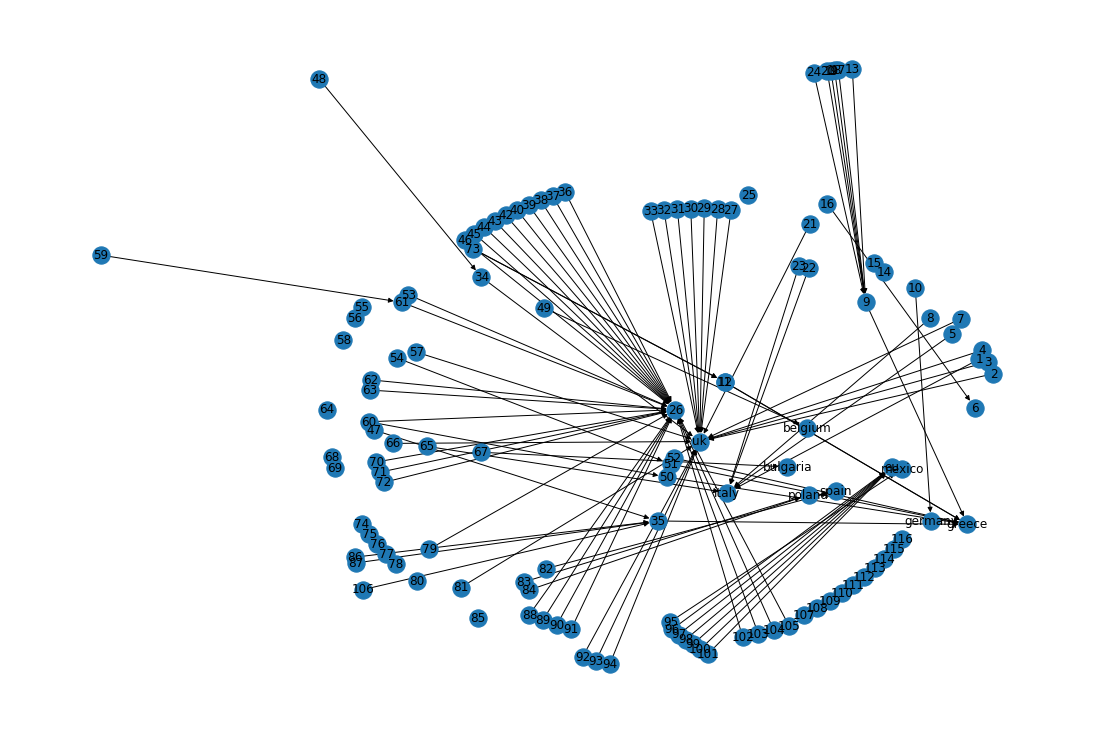

In [55]:
plt.figure(figsize=(15,10))
g.add_edges_from(elist)
nx.draw(g, with_labels = True, pos = nx.kamada_kawai_layout(g))